In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from os.path import join
from os import listdir
from pprint import pprint

from pandas import DataFrame
# import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from data_loading import load_csv_files
from utils import get_winter

In [3]:
data = load_csv_files(*[join('data', f) for f in listdir('data') if f.endswith('.csv')])

In [4]:
# get the data
df = DataFrame(data).transpose()
df.index.name = 'date'
df.reset_index(inplace=True)
# remove everything above 5 Celcius as we probably don't heat anyway
df = df[df['temp'] < 5]
# add the winter
df['winter'] = df['date'].apply(lambda date: get_winter(date))
df.head()

,date,kwh,temp,winter
26,2016-10-25,19.98,4.0,2017
27,2016-10-26,16.82,2.0,2017
28,2016-10-27,13.52,2.0,2017
32,2016-10-31,12.13,4.0,2017
36,2016-11-04,24.46,3.0,2017


In [5]:
# alt.Chart(df, width=500, height=500).mark_point().encode(
#     y='kwh',
#     x='temp',
#     color='winter:N',
# )

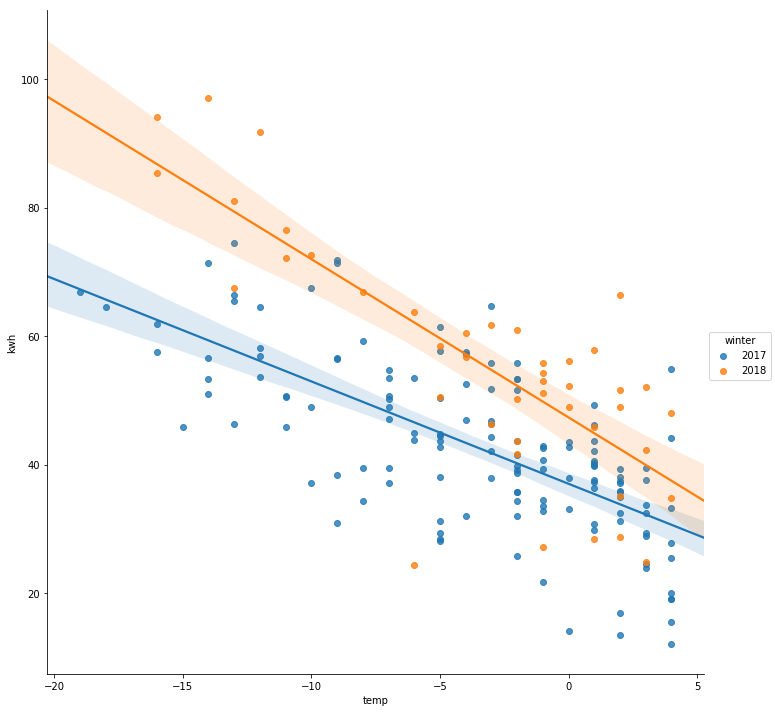

In [6]:
sns.lmplot(data=df, x='temp', y='kwh', hue='winter', size=10)